<a href="https://colab.research.google.com/github/TongkaiYang/Vision-Zero-Madison/blob/turrkey/CS_638_weekly_plots_(10_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime as dt
sns.set(style="white")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
raw_df = pd.read_csv('drive/My Drive/CS 638/Madison_crash_2009_2019.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



## This is an update from the "Accident pattern w.r.t day hour" plot. We are interested in the possible reasons leading to car accident.

Text(0, 0.5, 'Number of Accidents (in thousands)')

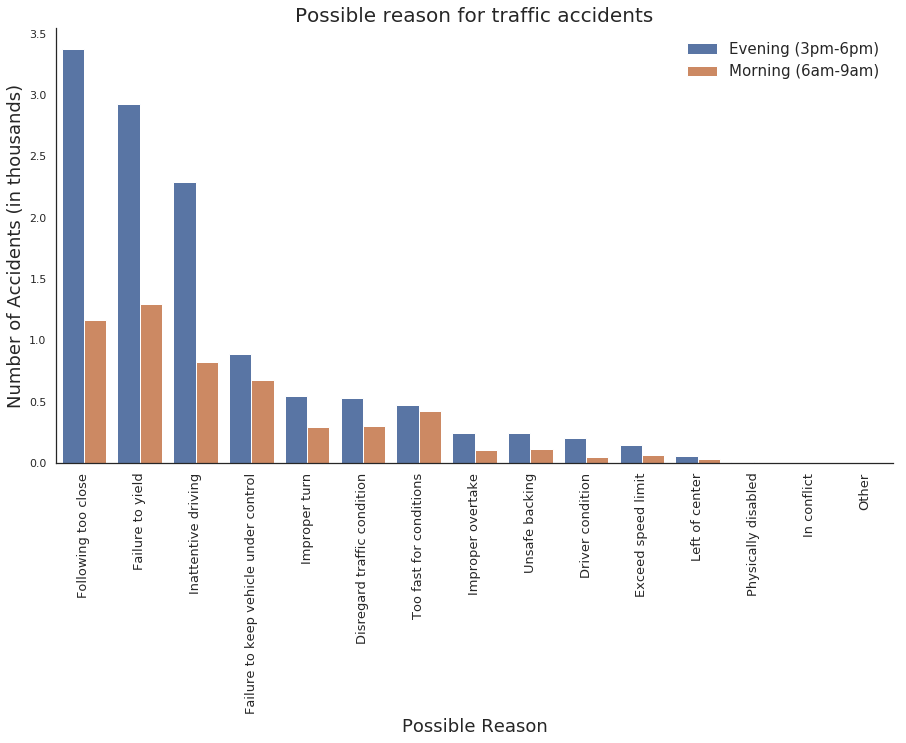

In [5]:
raw_df['ACCDDATE'] = pd.to_datetime(raw_df['ACCDDATE'])
week = [x.weekday() + 1 for x in raw_df['ACCDDATE']]
week_flag = ['weekday' if x >= 1 and x <= 5 else 'weekend' for x in week]
raw_df['week_flag'] = week_flag
mrng_rush = raw_df[(raw_df['NTFYHOUR'] >= 6) & (raw_df['NTFYHOUR'] <= 9) & (raw_df['week_flag'] == 'weekday')].copy()
even_rush = raw_df[(raw_df['NTFYHOUR'] >= 15) & (raw_df['NTFYHOUR'] <= 18) & (raw_df['week_flag'] == 'weekday')].copy()
def possible_reason(df):
  reason = {'DC':0, 'DIS':0,'DTC':0, 'FTC':0, 'FTY':0, 'FVC':0, 
            'IC':0,'ID':0,'IO':0,'IT':0,'LOC':0,'OTR':0,'SPD':0,'TFC':0,'UB':0}
  for i in range(df.shape[0]):
    if 'DC' in df['DRVRPC1'][i]:
      reason['DC'] += 1
    if 'DIS' in df['DRVRPC1'][i]:
      reason['DIS'] += 1
    if 'DTC' in df['DRVRPC1'][i]:
      reason['DTC'] += 1
    if 'FTC' in df['DRVRPC1'][i]:
      reason['FTC'] += 1
    if 'FTY' in df['DRVRPC1'][i]:
      reason['FTY'] += 1
    if 'FVC' in df['DRVRPC1'][i]:
      reason['FVC'] += 1
    if 'IC' in df['DRVRPC1'][i]:
      reason['IC'] += 1
    if 'ID' in df['DRVRPC1'][i]:
      reason['ID'] += 1
    if 'IO' in df['DRVRPC1'][i]:
      reason['IO'] += 1
    if 'IT' in df['DRVRPC1'][i]:
      reason['IT'] += 1
    if 'LOC' in df['DRVRPC1'][i]:
      reason['LOC'] += 1
    if 'OTR' in df['DRVRPC1'][i]:
      reason['OTR'] += 1
    if 'SPD' in df['DRVRPC1'][i]:
      reason['SPD'] += 1
    if 'TFC' in df['DRVRPC1'][i]:
      reason['TFC'] += 1
    if 'UB' in df['DRVRPC1'][i]:
      reason['UB'] += 1
  return reason
mrng_reason = pd.DataFrame.from_dict(possible_reason(mrng_rush.dropna(subset = ['DRVRPC1']).reset_index(drop = True)), orient = 'index', columns = ['mrng'])
even_reason = pd.DataFrame.from_dict(possible_reason(even_rush.dropna(subset = ['DRVRPC1']).reset_index(drop = True)), orient = 'index', columns = ['even'])
rush_reason = pd.concat([mrng_reason, even_reason], axis=1).reset_index()
rush_reason = pd.melt(rush_reason, id_vars = 'index', var_name = 'rush_hour', value_name = 'accd_num')
rush_reason['accd_num'] = rush_reason['accd_num'] / 1000
rush_reason = rush_reason.sort_values(by = ['accd_num'], ascending = False)
plt.figure(figsize = (15,8))
rush_reason_plt = sns.barplot(x='index', y='accd_num', hue='rush_hour', data=rush_reason)
rush_reason_plt.set_xticklabels(['Following too close', 'Failure to yield', 'Inattentive driving', 
                                 'Failure to keep vehicle under control', 'Improper turn', 'Disregard traffic condition',
                                 'Too fast for conditions', 'Improper overtake', 'Unsafe backing',
                                 'Driver condition', 'Exceed speed limit', 'Left of center', 'Physically disabled',
                                 'In conflict', 'Other'], rotation = 90, fontsize = 13)
rush_reason_leg = rush_reason_plt.get_legend_handles_labels()[0]
rush_reason_plt.legend(rush_reason_leg, ['Evening (3pm-6pm)', 'Morning (6am-9am)'], title='', frameon = False, loc='upper right', prop={'size': 15})
rush_reason_plt.spines['right'].set_visible(False)
rush_reason_plt.spines['top'].set_visible(False)
rush_reason_plt.set_title('Possible reason for traffic accidents', fontsize = 20)
rush_reason_plt.set_xlabel('Possible Reason', fontsize = 18)
rush_reason_plt.set_ylabel('Number of Accidents (in thousands)', fontsize = 18)


*   Top five possible reasons: following too close, fail to yield, inattentive driving, fail to control vehicle and improper turn.
*   For evening rush hour, following too close, fail to yield and inattentive driving happened much more than those in morning rush hour.
*   Following too close is not the most frequent reason for morning rush hour BUT this is the most frequent reason for evening rush hour.





## Is speeding causing severe crash?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



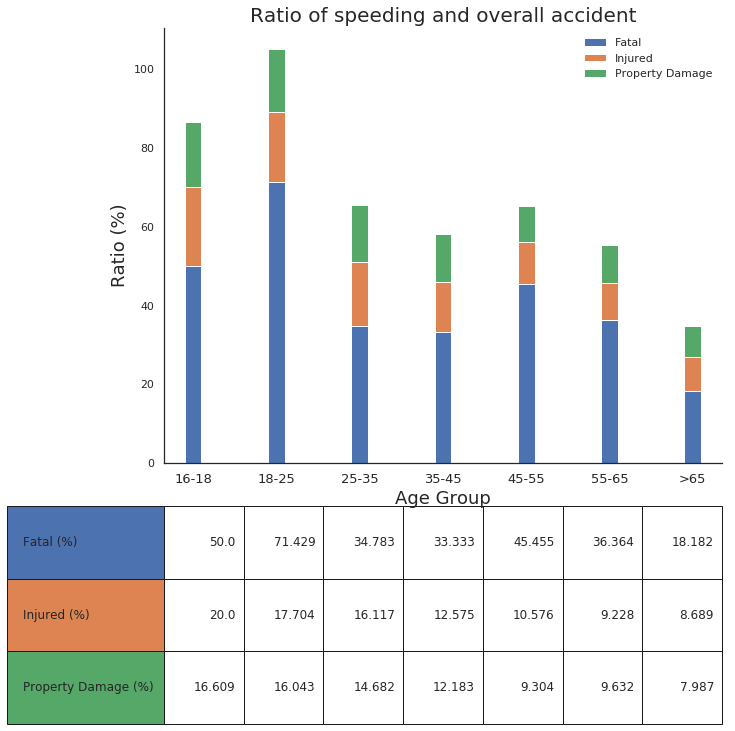

In [24]:
spd_df = raw_df[raw_df['STNM11'].str.contains('346.57').fillna(False) | raw_df['STNM12'].str.contains('346.57').fillna(False)
                | raw_df['DRVRPC1'].str.contains('SPD') | raw_df['DRVRPC1'].str.contains('TFC') | raw_df['DRVRPC1'].str.contains('FVC')]
def age_flag(df):
  if int(df['AGE1']) == 0:
    flag = None
  if int(df['AGE1']) < 18 and int(df['AGE1']) > 0:
    flag = '16-18'
  if int(df['AGE1']) >= 18 and int(df['AGE1']) < 25:
    flag = '18-25'
  if int(df['AGE1']) >= 25 and int(df['AGE1']) < 35:
    flag = '25-35'
  if int(df['AGE1']) >= 35 and int(df['AGE1']) < 45:
    flag = '35-45'
  if int(df['AGE1']) >= 45 and int(df['AGE1']) < 55:
    flag = '45-55'
  if int(df['AGE1']) >= 55 and int(df['AGE1']) < 65:
    flag = '55-65'
  if int(df['AGE1']) >= 65:
    flag = '>65'
  return flag
raw_df['AGE_FLAG'] = raw_df.dropna(subset = ['AGE1']).apply(age_flag, axis = 1)
spd_df['AGE_FLAG'] = spd_df.apply(age_flag, axis = 1)
AGE_SVR = spd_df.groupby(['AGE_FLAG','ACCDSVR']).count()['DOCTNMBR'].reset_index()
AGE_SVR['DOCTNMBR2'] = raw_df.dropna(subset = ['AGE1']).groupby(['AGE_FLAG', 'ACCDSVR']).count()['DOCTNMBR'].reset_index()['DOCTNMBR']
AGE_SVR['spd_ratio'] = round(AGE_SVR['DOCTNMBR'] / AGE_SVR['DOCTNMBR2'] * 100, 3)
AGE_SVR = pd.pivot_table(AGE_SVR, values = 'spd_ratio', index = 'AGE_FLAG', columns = 'ACCDSVR')
#plt.figure(figsize = (15,8))
AGE_SVR_plt = AGE_SVR.plot(kind="bar", stacked=True, width = 0.2)
AGE_SVR_leg = AGE_SVR_plt.get_legend_handles_labels()[0]
AGE_SVR_plt.legend(AGE_SVR_leg, ['Fatal', 'Injured', 'Property Damage'], title='', frameon=False, loc='upper right')
AGE_SVR_plt.set_xticklabels(['16-18', '18-25', '25-35', '35-45', '45-55', '55-65', '>65'], rotation = 0, fontsize = 13)
AGE_SVR_plt.spines['right'].set_visible(False)
AGE_SVR_plt.spines['top'].set_visible(False)
AGE_SVR_plt.set_title('Ratio of speeding and overall accident', fontsize = 20)
AGE_SVR_plt.set_xlabel('Age Group', fontsize = 18)
AGE_SVR_plt.set_ylabel('Ratio (%)', fontsize = 18)
plt.gcf().set_size_inches(10, 8)
plt.table(cellText = AGE_SVR.T.values, rowLabels=['Fatal (%)', 'Injured (%)', 'Property Damage (%)'], rowColours = ['C0', 'C1', 'C2'],
          loc = 'bottom', bbox=[0.0, -0.6, 1.0, 0.5]) #bbox = [left, bottom, width, height]



*   The answer is TRUE! Speeding will lead to severe accident
*   Astonishing fact: 71% fatal accidents among 18-25 years old drivers are caused by speeding. 
*   Large part of injured accident among young age groups are because of speeding.
*   In general, young people tend to have more traffic accidents than older people.




